<a href="https://colab.research.google.com/github/Volviane/Image_Segmentation/blob/master/Pytorch_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [**The Full Original Tutorial**](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
What is PyTorch?
================

It’s a Python-based scientific computing package targeted at two sets of
audiences:

-  A replacement for NumPy to use the power of GPUs
-  a deep learning research platform that provides maximum flexibility
   and speed

1.Getting Started
---------------

Tensors
^^^^^^^

Tensors are similar to NumPy’s ndarrays, with the addition being that
Tensors can also be used on a GPU to accelerate computing.



In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

In [8]:
# torch.empty()
torch.empty((2,3))

tensor([[6.0403e-36, 0.0000e+00, 4.4842e-44],
        [0.0000e+00,        nan, 6.4460e-44]])

In [9]:
# torch.rand() 
torch.rand((3,4))

tensor([[0.2449, 0.9357, 0.8950, 0.9765],
        [0.2057, 0.9867, 0.6985, 0.5886],
        [0.7002, 0.6039, 0.3650, 0.0148]])

In [10]:
# torch.zeros()
a = torch.zeros((2,3))
a

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [11]:
# torch.tensor()
torch.tensor([1,2,3])

tensor([1, 2, 3])

In [12]:
# torch.randn_like()
torch.rand_like(torch.tensor([1,2]))

RuntimeError: ignored

In [13]:
# size()
a.size()


torch.Size([2, 3])

In [14]:
# torch.add()
a = torch.rand(2,3)
b= torch.rand(2,3)

a+b==torch.add(a,b)

tensor([[True, True, True],
        [True, True, True]])

In [15]:
# item()
torch.rand(1).item()


0.3261205554008484

In [16]:
# a.numpy()
# torch.from_numpy()

a = np.array([1,2,3])
torch.from_numpy(a).numpy()


array([1, 2, 3])

In [17]:
torch.cuda.is_available()

True

In [18]:
%%time
a = torch.rand(1000,1000)
y = torch.rand_like(a)
for i in range(10):
    y = y**y

CPU times: user 115 ms, sys: 6.87 ms, total: 122 ms
Wall time: 129 ms


In [19]:
%%time
a = torch.rand(1000,1000)
y = torch.rand_like(a,device='cuda')
for i in range(10):
    y = y**y

CPU times: user 1.64 s, sys: 747 ms, total: 2.38 s
Wall time: 8.04 s


# 2.Autograd: Automatic Differentiation


``` code
            def gradient(y,y_pred,x):
                    return np.dot(x.T,(y_pred-y))

```

In [20]:
x = torch.rand(1, requires_grad=True)
y = torch.rand(1, requires_grad=True)
z= torch.rand(1, requires_grad=True)

# print(x.grad,y.grad,z.grad)
print(x,y)

tensor([0.4577], requires_grad=True) tensor([0.8886], requires_grad=True)


In [21]:
one = x * y
two = one + z
three = torch.sigmoid(two)

print(three)

tensor([0.6640], grad_fn=<SigmoidBackward>)


In [22]:
three.backward()

print(x.grad,y.grad,z.grad)

tensor([0.1982]) tensor([0.1021]) tensor([0.2231])


# CNN

In [0]:
def get_shape(h,p=0,k=3,s=1):
    return ((h+(2*p)-k)/s)+1

In [24]:
get_shape(15,k=3)//2

6.0

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [0]:
class Classification(nn.Module):
    def __init__(self):
        super(Classification,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=64,kernel_size=3)
        self.conv2 = nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3)
        self.fc1 = nn.Linear(in_features=6*6*128,out_features=120)
        self.fc2 = nn.Linear(in_features=120,out_features=10)
        


    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),2)
        x = F.max_pool2d(F.relu(self.conv2(x)),2)

        x = x.view(-1,6*6*128)

        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        return x

    def num_flat_features(self,x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        
        return num_features



In [27]:
net =  Classification()
print(net)

Classification(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=4608, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)


In [0]:
# from torchsummary import summary
# summary(net.to('cpu'), (3, 224, 224))

In [29]:
param = list(net.parameters())
param[0][0][0].size()

torch.Size([3, 3])

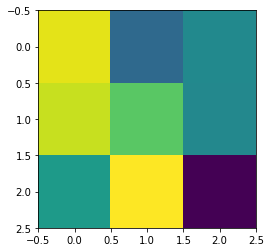

In [30]:
filter_0 = param[0][0][0].detach().numpy()
plt.imshow(filter_0)

In [31]:
input = torch.randn(1, 3, 32, 32)
out = net(input)
print(out.size())

torch.Size([1, 10])


In [0]:
# Zero the gradient buffers of all parameters and backprops with random gradients:

net.zero_grad()
out.backward(torch.randn(1, 10))

In [33]:
# Loss Function
output = net(input)
target = torch.randn(10)  
target = target.view(1, -1) 

criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.9954, grad_fn=<MseLossBackward>)


In [0]:
loss.backward()
# net.conv1.weight.grad

In [35]:
import torch.optim as optim

input = torch.randn(1, 3, 32, 32)
# out = net(input)
# print(out)

optimizer = optim.SGD(net.parameters(), lr=0.01)

optimizer.zero_grad() 
print(net.conv1.bias)  
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step() 
print(net.conv1.bias) 

Parameter containing:
tensor([ 0.0485, -0.1254,  0.0991, -0.1661, -0.1807, -0.1867,  0.0583,  0.0348,
        -0.1167,  0.0790,  0.0027,  0.0966,  0.1844, -0.0631, -0.0327,  0.0313,
        -0.0149,  0.0106,  0.0990,  0.1025, -0.1669, -0.1315,  0.1772,  0.0640,
         0.0705, -0.0899,  0.0940, -0.1226, -0.1669,  0.0552,  0.1315,  0.0593,
        -0.0109, -0.1327,  0.0026, -0.0155, -0.1717, -0.0748,  0.0272,  0.0049,
        -0.0235, -0.1228,  0.0363, -0.0457, -0.0685,  0.1202,  0.0469,  0.1358,
         0.0866, -0.0086, -0.0644, -0.1294, -0.1572,  0.1296,  0.0455, -0.1560,
        -0.0371, -0.1796, -0.1292, -0.0732,  0.1576, -0.1124,  0.0771,  0.1917],
       requires_grad=True)
Parameter containing:
tensor([ 0.0485, -0.1254,  0.0990, -0.1662, -0.1807, -0.1867,  0.0584,  0.0347,
        -0.1167,  0.0789,  0.0029,  0.0966,  0.1844, -0.0630, -0.0327,  0.0312,
        -0.0149,  0.0106,  0.0989,  0.1025, -0.1668, -0.1316,  0.1771,  0.0640,
         0.0706, -0.0899,  0.0941, -0.1227, -0.1

# TRAINING A CLASSIFIER 

[Cifar Data](https://www.cs.toronto.edu/~kriz/cifar.html)

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

https://pytorch.org/docs/stable/torchvision/transforms.html

In [0]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [41]:

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)


testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

0it [00:00, ?it/s]

 99%|█████████▉| 168566784/170498071 [00:12<00:00, 18011365.33it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


```

        data_path = 'data/train/'
        train_dataset = torchvision.datasets.ImageFolder(
            root=data_path,
            transform=transform
        )
```

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

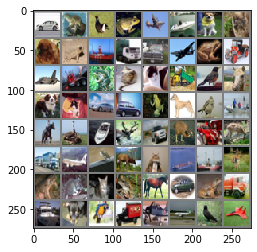

  car  frog  bird  frog


In [61]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [62]:
net =  Classification()
net

Classification(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=4608, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=10, bias=True)
)

In [0]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [74]:
for epoch in range(1):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        print(loss)
        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

tensor(1.8507, grad_fn=<NllLossBackward>)
tensor(1.6965, grad_fn=<NllLossBackward>)
tensor(1.8135, grad_fn=<NllLossBackward>)
tensor(1.8886, grad_fn=<NllLossBackward>)
tensor(1.8062, grad_fn=<NllLossBackward>)
tensor(1.8785, grad_fn=<NllLossBackward>)
tensor(1.7887, grad_fn=<NllLossBackward>)
tensor(1.7524, grad_fn=<NllLossBackward>)
tensor(1.7837, grad_fn=<NllLossBackward>)
tensor(1.8184, grad_fn=<NllLossBackward>)
tensor(1.7931, grad_fn=<NllLossBackward>)
tensor(1.8139, grad_fn=<NllLossBackward>)
tensor(1.7143, grad_fn=<NllLossBackward>)
tensor(1.7430, grad_fn=<NllLossBackward>)
tensor(2.0245, grad_fn=<NllLossBackward>)
tensor(1.9714, grad_fn=<NllLossBackward>)
tensor(1.8460, grad_fn=<NllLossBackward>)
tensor(1.6720, grad_fn=<NllLossBackward>)
tensor(1.9937, grad_fn=<NllLossBackward>)
tensor(1.8412, grad_fn=<NllLossBackward>)
tensor(1.8720, grad_fn=<NllLossBackward>)
tensor(1.7559, grad_fn=<NllLossBackward>)
tensor(1.8076, grad_fn=<NllLossBackward>)
tensor(1.9499, grad_fn=<NllLossBac

In [0]:
PATH = './data/cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [73]:
ls ./data/ 

cifar-10-batches-py/  cifar-10-python.tar.gz  cifar_net.pth


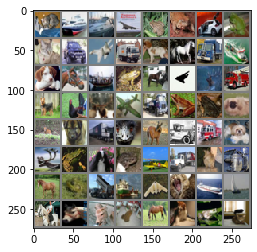

GroundTruth:    cat  ship  ship plane


In [67]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [75]:
net = Classification()
net.load_state_dict(torch.load('./data/cifar_net.pth'))

<All keys matched successfully>

In [0]:
outputs = net(images)

In [79]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   bird   cat  ship  ship


In [80]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 35 %


In [81]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 46 %
Accuracy of   car : 36 %
Accuracy of  bird : 17 %
Accuracy of   cat : 17 %
Accuracy of  deer :  7 %
Accuracy of   dog : 27 %
Accuracy of  frog : 67 %
Accuracy of horse : 45 %
Accuracy of  ship : 48 %
Accuracy of truck : 48 %


# **What can we do to improve our network?**